# Random forest classifier

This notebook contains a random forest classifier.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier

import json
import numpy as np

import utils

/Users/thead/anaconda/envs/toolbox-talk/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data loading and augmentation

We augment the dataset by adding rotations and flips of the original images to the training data.

For our random forest estimator we need to linearize the data from a 3D tensor to a vector.

In [4]:
X, y = utils.load_data(one_hot=False)

In [5]:
def linearize(X):
    return X.reshape(X.shape[0], 80 * 80 * 3)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

def augment(X, y):
    X_prime = np.concatenate((
        X,
        np.rot90(X, 1, (1,2)),
        np.rot90(X, 2, (1,2)),
        np.rot90(X, 3, (1,2)),
        np.flip(X, 1),
        np.flip(X, 1)
        ))
    y_prime = np.concatenate((y, y, y, y, y, y))
    return X_prime, y_prime

X_train, y_train = augment(X_train, y_train)

X_train = linearize(X_train)
X_test = linearize(X_test)

In [7]:
X_train.shape, y_train.shape

((12600, 19200), (12600,))

## Setup, train and score classifier

In [ ]:
n_estimators = 10

In [8]:
clf = RandomForestClassifier(n_estimators=n_estimators, n_jobs=4)

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
accuracy = clf.score(X_test, y_test)
train_accuracy = clf.score(X_train, y_train)

In [11]:
print("Test accuracy:", accuracy)

Test accuracy: 0.9457142857142857


## Debugging plots

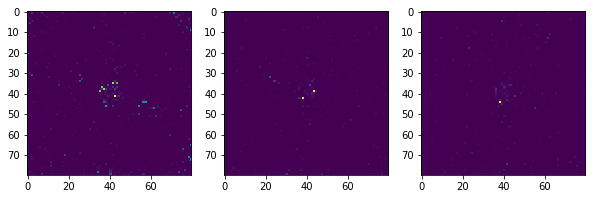

In [12]:
importances = clf.feature_importances_
importances = importances.reshape(80, 80, 3)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(importances[:,:,0])
axs[1].imshow(importances[:,:,1])
axs[2].imshow(importances[:,:,2])

In [13]:
import papermill as pm

In [14]:
pm.record("name", "random forest")
pm.record('n_estimators', clf.n_estimators)
pm.record('test_accuracy', accuracy)
pm.record('train_accuracy', train_accuracy)